In [1]:
import tensorflow as tf
import numpy as np
sess = tf.InteractiveSession()

In [2]:
import matplotlib
matplotlib.use('GTKAgg')
import matplotlib as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

In [3]:
#
# First get the data sets. We have training data (images + their correct labels),
# validation data (images + labels) and test data. 
# during the training phase, we'll use the training data to train the net and then use the
# validation data to monitor how well we are training the results. Use of the validation data
# helps with the selection of hyper parameters in our model. Once we're satisfied with the chosen
# hyper-parameters and have our model trained on the data, we can then use it. As a last step, we
# use the test data as a last check on our model. It's important to not use the test data during training.
#
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


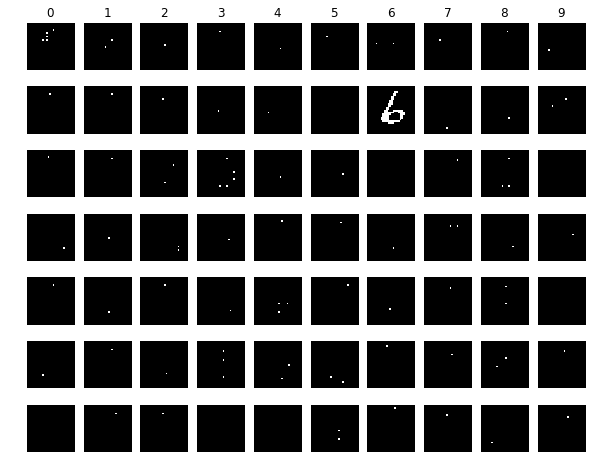

In [4]:
# Use the matplotlib to display a 7x10 grid showing 7 randomly selected images
# per class
def display_samples(images, labels):
    classes = range(0, 10)
    num_classes = len(classes)
    samples_per_class = 7
    #X_train=images
    # convert the 1-hot vector to a digit for the image plot below
    
    # Note: We are picking the digit with the highest probablity using the
    # argmax function. HOWEVER: we could use the expected value by computing
    # note: this is actually the expected value for each image
    # the sum of each digit times its probability.
    # digit=np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
    # y_train=np.sum(labels * digit, axis=1)
    y_train=np.argmax(labels, axis=1)

    # This will pick a different set of images each time its run
    for y, cls in enumerate(classes):
        idxs = np.flatnonzero(y_train == y)
        idxs = np.random.choice(idxs, samples_per_class, replace=False)
        for i, idx in enumerate(idxs):
            #np.rint() allows for us to us the expected value instead of argmax
            plt_idx = np.rint(i * num_classes + y + 1)
            matplotlib.pyplot.subplot(samples_per_class, num_classes, plt_idx)
            X_train_copy=images[idx].copy().reshape(28,28)
            matplotlib.pyplot.imshow(X_train_copy.astype('uint8'))
            matplotlib.pyplot.axis('off')
            if i == 0:
                matplotlib.pyplot.title(cls)
    matplotlib.pyplot.show()

display_samples(mnist.train.images, mnist.train.labels)

In [5]:
#
# The next few cells set up our computational graphs.
#

In [6]:
#
# Define our model 
# Our 'model' is simply y=softmax(x*W + b)
# where x:= placeholder that takes our input
#       W, b:= trainable variables
#       y is the result tensor
x = tf.placeholder(tf.float32, [None, 784])

W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))

y = tf.nn.softmax(tf.matmul(x, W) + b)

In [7]:
# our loss function simply measures the cross entropy of the desired and predicted values
y_ = tf.placeholder(tf.float32, [None, 10])

cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y), reduction_indices=[1]))

# Once we have the loss function, cross_entropy, we can use gradient descent to find a
# minima of the function
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)


In [8]:
# we'll also want to determine the accuracy of our predictions.
# we compare the digit with the highest probability to the correct value (y_)
# 
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [9]:
# We have our graphs setup, now let's execute them in a session

In [10]:
# now prepare to do training.

# initialize global variables
tf.global_variables_initializer().run()

# do the training by randomly selecting 100 images from our set. Do this 1000 times
for _ in range(1000):
  batch_xs, batch_ys = mnist.train.next_batch(100)
  sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})


In [11]:
# now let's check our accuracy .
print(sess.run(accuracy, feed_dict={x: mnist.test.images, y_: mnist.test.labels}))

0.9166


In [ ]:
# note: if you get an error Dst tensor is not initialized, this means that your GPU is full. 
# Kill all your python instances